In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import TensorBoard

Dimensionality of the training image dataset and labels:
(60000, 28, 28)
(60000,)
Dimensionality of the test image dataset and labels:
(10000, 28, 28)
(10000,)


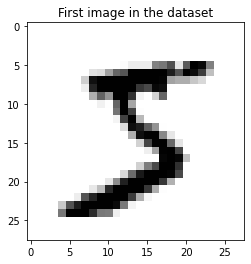

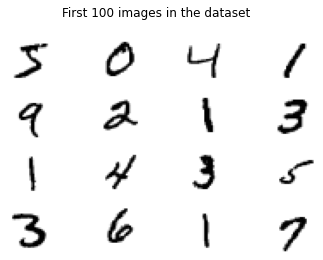

Labels of the first 16 images in the dataset:
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7]


In [2]:
# load the dataset using the builtin Keras method
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('Dimensionality of the training image dataset and labels:')
print(X_train.shape)
print(y_train.shape)

print('Dimensionality of the test image dataset and labels:')
print(X_test.shape)
print(y_test.shape)

# show the first image in the dataset
plt.figure()
plt.imshow(X_train[0], cmap='gray_r', vmin=0, vmax=255)
plt.title('First image in the dataset')

# show the first 16 images in the dataset in a 4x4 gird
fig = plt.figure()
for n in range(16):
    ax = fig.add_subplot(4, 4, n + 1)
    plt.imshow(X_train[n], cmap='gray_r', vmin=0, vmax=255)   
    plt.axis('off')
fig.suptitle('First 100 images in the dataset')
plt.show()

# print the labels of the first 16 images in the dataset
print('Labels of the first 16 images in the dataset:')
print(y_train[:16])

# Preprocessing

In [3]:
# derive a validation set from the training set
# the original training set is split into 
# new training set (90%) and a validation set (10%)
X_train, X_val = train_test_split(X_train, test_size=0.10, random_state=101)
y_train, y_val = train_test_split(y_train, test_size=0.10, random_state=101)


print('Dimensionality of the new training image dataset and labels:')
print(X_train.shape)
print(y_train.shape)


print('Dimensionality of the validation image dataset and labels:')
print(X_val.shape)
print(y_val.shape)

Dimensionality of the new training image dataset and labels:
(54000, 28, 28)
(54000,)
Dimensionality of the validation image dataset and labels:
(6000, 28, 28)
(6000,)


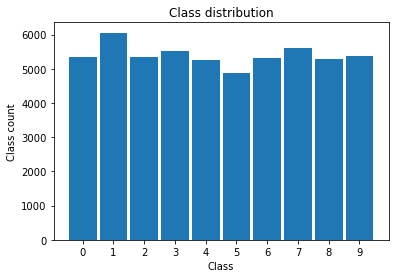

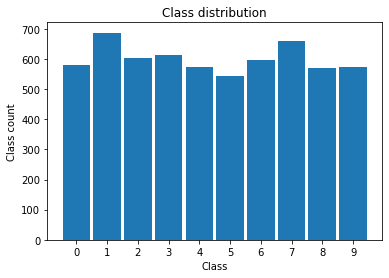

In [4]:
def plt_classes(y, num_class=10):
    plt.figure()
    plt.hist(y, bins=range(0,num_class+1), align='left', rwidth=0.9)
    plt.xlabel('Class')
    plt.ylabel('Class count')
    plt.xticks(range(0,num_class))
    plt.title('Class distribution')

    
# show the class label distribution in the training dataset
plt_classes(y_train)

# show the class label distribution in the validation dataset
plt_classes(y_val)

In [5]:
# the shape of the data matrix is NxHxW, where
# N is the number of images,
# H and W are the height and width of the images
# keras expect the data to have shape NxHxWxC, where
# C is the channel dimension
X_train = np.reshape(X_train, (-1,28,28,1)) 
X_val = np.reshape(X_val, (-1,28,28,1))
X_test = np.reshape(X_test, (-1,28,28,1))


# convert the datatype to float32
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')


# normalize our data values to the range [0,1]
X_train /= 255
X_val /= 255
X_test /= 255

In [6]:
# class label preprocessing for keras

# we see that we have a 1D-array with length 54000
print(y_train.shape) 


# since we have 10 different classes, what does this array look like?
# let's look at the first 20 labels
print(y_train[:20]) 


# convert 1D class arrays to 10D class matrices
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)


# check the output
print(y_train.shape)
# this is now a one-hot encoded matrix
print(y_train[:20])

(54000,)
[1 3 9 2 7 8 7 5 9 6 7 6 6 5 1 2 3 5 7 2]
(54000, 10)
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


# Buidling a model

In [7]:
model = Sequential()
# flatten the 28x28x1 pixel input images to a row of pixels (a 1D-array)
model.add(Flatten(input_shape=(28,28,1))) 
for i in range(0,58):
    # fully connected layer with 64 neurons and ReLU nonlinearity
    model.add(Dense(512, activation='relu'))
# output layer with 10 nodes (one for each class) and softmax nonlinearity
model.add(Dense(10, activation='softmax'))

In [8]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# use this variable to name your model
model_name="my_first_model"

# create a way to monitor our model in Tensorboard
tensorboard = TensorBoard("logs/{}".format(model_name))

# train the model
model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1, validation_data=(X_val, y_val), callbacks=[tensorboard])

Epoch 1/10
1688/1688 [==============================] - 118s 69ms/step - loss: 2.3020 - accuracy: 0.1076 - val_loss: 2.3007 - val_accuracy: 0.1145
Epoch 2/10
1688/1688 [==============================] - 116s 69ms/step - loss: 2.3015 - accuracy: 0.1101 - val_loss: 2.3007 - val_accuracy: 0.1145
Epoch 3/10
1688/1688 [==============================] - 117s 69ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3006 - val_accuracy: 0.1145
Epoch 4/10
1688/1688 [==============================] - 116s 69ms/step - loss: 2.3014 - accuracy: 0.1105 - val_loss: 2.3008 - val_accuracy: 0.1145
Epoch 5/10
1688/1688 [==============================] - 117s 69ms/step - loss: 2.3015 - accuracy: 0.1092 - val_loss: 2.3008 - val_accuracy: 0.1145
Epoch 6/10
1688/1688 [==============================] - 112s 67ms/step - loss: 2.3012 - accuracy: 0.1129 - val_loss: 2.3007 - val_accuracy: 0.1145
Epoch 7/10
1688/1688 [==============================] - 121s 72ms/step - loss: 2.3016 - accuracy: 0.1123 - val_loss: 2

In [9]:
score = model.evaluate(X_test, y_test, verbose=0)


print("Loss: ",score[0])
print("Accuracy: ",score[1])

Loss:  2.300989866256714
Accuracy:  0.11349999904632568


In [ ]:
def neural_netweork_classification(data=mnist.load_data(), batch_size=32, epochs=10, hidden_layers=1, neurons=64):